In [1]:
import csv
import numpy as np
import os
np.random.seed(42)
import random
random.seed(42)

# Question 1

In [2]:
file_ratings = os.path.expanduser('ml-latest-small/ratings.csv')
file_movies = os.path.expanduser('ml-latest-small/movies.csv')

user_id = []
movie_id = []
ratings = []

with open(file_ratings) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        user_id.append(int(row['userId']))
        movie_id.append(int(row['movieId']))
        ratings.append(float(row['rating']))

In [3]:
user_number = len(np.unique(user_id))
movie_number = len(np.unique(movie_id))
movie_list = dict()
movie_id_u=[]
movie_idx = 0
for id in movie_id:
    if id not in movie_id_u:
        movie_list[id]=int(movie_idx)
        movie_id_u.append(id)
        movie_idx += 1
        
total_available_rating = len(user_id)
total_possible_rating = user_number * movie_number
print('Number of Users:', user_number)
print('Number of Rated Movies:', movie_number)
print('Sparsity =', float(total_available_rating) / total_possible_rating)

Number of Users: 610
Number of Rated Movies: 9724
Sparsity = 0.016999683055613623


# Question 2

In [4]:
import matplotlib.pyplot as plt
R = np.zeros((user_number, movie_number))  
W = np.zeros((user_number, movie_number))
for i in range(len(user_id)):
    x = user_id[i] - 1
    y = int(movie_list[movie_id[i]])
    R[x,y] = ratings[i]
    W[x,y] = 1
rating_bins, ratingFreq = np.unique(np.sort(R), return_counts = True)
print('ratings =', rating_bins[1:])
print('counts =', ratingFreq[1:])
plt.bar(rating_bins[1:], ratingFreq[1:], 
        width = 0.45, tick_label = rating_bins[1:], align = 'edge')
plt.xlabel('Ratings')
plt.ylabel('Counts')
plt.show()

ratings = [0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
counts = [ 1370  2811  1791  7551  5550 20047 13136 26818  8551 13211]


# Question 3

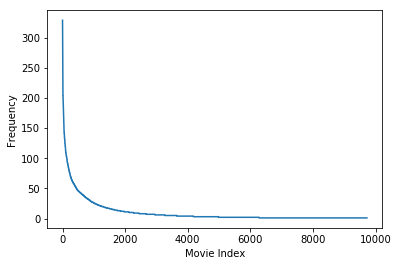

In [5]:
movieFreq = np.sum(R != 0, axis = 0)
movieFreq_dict = {m: movieFreq[movie_list[m]] for m in movie_list.keys()}
plt.plot(np.sort(movieFreq)[::-1])
plt.xlabel('Movie Index')
plt.ylabel('Frequency')
plt.show()

# Question 4

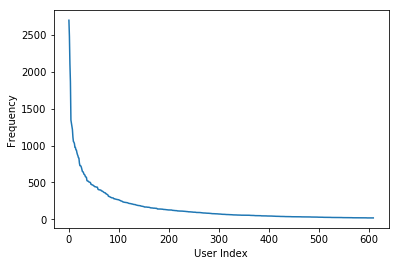

In [6]:
userFreq = np.sum(R != 0 , axis = 1)
plt.plot(np.sort(userFreq)[::-1])
plt.xlabel('User Index')
plt.ylabel('Frequency')
plt.show()

# Question 5

In [7]:
# Details are in the report.

# Question 6

variance of ratings =  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]
counts =  [5996 2313  990  265  100   22   27    4    4    1    2]


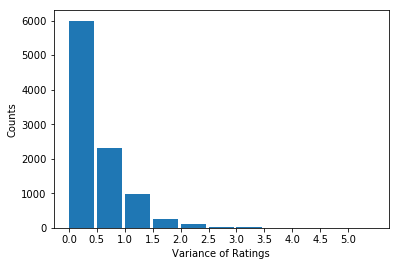

In [8]:
movieVar = [np.var([e for e in row if e != 0]) for row in np.transpose(R)]
movieVar_dict = {m: movieVar[movie_list[m]] for m in movie_list.keys()}
movieVar_bins = np.arange(0, np.max(movieVar) + 0.5, 0.5)
movieVar_height, _ = np.histogram(movieVar, movieVar_bins)
print('variance of ratings = ', movieVar_bins)
print('counts = ', movieVar_height)
plt.bar(movieVar_bins[:-1], movieVar_height,
        tick_label = movieVar_bins[:-1], width = 0.45, align = 'edge')
# plt.title("Distribution of variance of the rating values for each moive")
plt.xlabel('Variance of Ratings')
plt.ylabel('Counts')
plt.show()

# Question 10

In [9]:
from surprise.model_selection import cross_validate
from surprise import KNNWithMeans
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import accuracy
reader = Reader(line_format = 'user item rating timestamp', sep = ',', skip_lines = 1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader)

kf = KFold(n_splits = 10)
kValues = range(2, 102, 2)

RMSEs10 = []
MAEs10 = []
for k in kValues:
    algo = KNNWithMeans(k = k, sim_options = {'name': 'pearson', 'user_based': True})
    rmse_kf = []
    mae_kf = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        rmse_kf.append(accuracy.rmse(predictions, verbose = False))
        mae_kf.append(accuracy.mae(predictions, verbose = False))
    RMSEs10.append(np.mean(rmse_kf))
    MAEs10.append(np.mean(mae_kf))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.

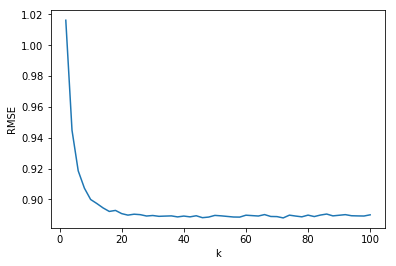

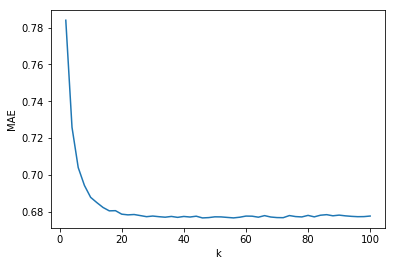

In [10]:
plt.plot(kValues, RMSEs10)
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

plt.plot(kValues, MAEs10)
plt.xlabel('k')
plt.ylabel('MAE')
plt.show()

# Question 11

In [11]:
for i in range(len(kValues)):
    print('k =', kValues[i], ' RMSE =', RMSEs10[i], ' MAE =', MAEs10[i])

k = 2  RMSE = 1.0162014435317746  MAE = 0.7839689816510724
k = 4  RMSE = 0.9448816093685493  MAE = 0.725837902308
k = 6  RMSE = 0.9185502219725906  MAE = 0.7039564630665325
k = 8  RMSE = 0.9072998847422064  MAE = 0.6942547698139385
k = 10  RMSE = 0.8999792211274047  MAE = 0.6877810243658387
k = 12  RMSE = 0.897365963069174  MAE = 0.6849219818083256
k = 14  RMSE = 0.8945264848442331  MAE = 0.6822746840667484
k = 16  RMSE = 0.8922414042791033  MAE = 0.6804485917696319
k = 18  RMSE = 0.8928989309151172  MAE = 0.6805430060604903
k = 20  RMSE = 0.8908225769885071  MAE = 0.67864720934731
k = 22  RMSE = 0.889850186754213  MAE = 0.6782630546138348
k = 24  RMSE = 0.8904502936034906  MAE = 0.6784555820640088
k = 26  RMSE = 0.8901458597250496  MAE = 0.6778760255152869
k = 28  RMSE = 0.8892722775046907  MAE = 0.6772828282009943
k = 30  RMSE = 0.8896039873954198  MAE = 0.6776272957658482
k = 32  RMSE = 0.8890720852105224  MAE = 0.6772745179999481
k = 34  RMSE = 0.889223494577735  MAE = 0.6769975994

In [12]:
best_k = -1
for i in range(1,len(kValues)-3):
    if (abs(RMSEs10[i]-RMSEs10[i-1]) / RMSEs10[i]) <= 0.001 and (abs(MAEs10[i]-MAEs10[i-1]) / MAEs10[i]) <= 0.001\
    and (abs(RMSEs10[i+1]-RMSEs10[i]) / RMSEs10[i+1]) <= 0.001 and (abs(MAEs10[i+1]-MAEs10[i]) / MAEs10[i+1]) <= 0.001\
    and (abs(RMSEs10[i+2]-RMSEs10[i+1]) / RMSEs10[i+2]) <= 0.001 and (abs(MAEs10[i+2]-MAEs10[i+1]) / MAEs10[i+2]) <= 0.001\
    and (abs(RMSEs10[i+3]-RMSEs10[i+2]) / RMSEs10[i+3]) <= 0.001 and (abs(MAEs10[i+3]-MAEs10[i+2]) / MAEs10[i+3]) <= 0.001:
        print('best_k =', kValues[i])
        best_k = kValues[i]
        break

best_k = 24


In [13]:
RMSE_avg = 0
MAE_avg = 0
for j in range(i,len(kValues)):
    RMSE_avg += RMSEs10[i]
    MAE_avg += MAEs10[i]
RMSE_avg /= len(kValues) - i
MAE_avg /= len(kValues) - i
print('steady state values of average RMSE: ',RMSE_avg)
print('steady state values of average MAE: ',MAE_avg)

steady state values of average RMSE:  0.8904502936034905
steady state values of average MAE:  0.6784555820640082


# Question 12

In [14]:
def popTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] > 2]

def unpopTrim(testset, movieFreq):
    return [x for x in testset if movieFreq[int(x[1])] <= 2]

def highVarTrim(testset, movieFreq, movieVar):
    return [x for x in testset 
            if movieVar[int(x[1])] >= 2 and movieFreq[int(x[1])] >= 5]

In [15]:
RMSE_pop = []; MAE_pop = []
RMSE_un = []; MAE_un = []
RMSE_var = []; MAE_var = []
for k in kValues:
    print('k = ', k)
    algo = KNNWithMeans(k=k, sim_options={'name': 'pearson', 'user_based': True})
    rmse_pop = []; mae_pop = []
    rmse_un = []; mae_un = []
    rmse_var = []; mae_var = []
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        
        prediction1 = algo.test(popTrim(testset, movieFreq_dict))
        prediction2 = algo.test(unpopTrim(testset, movieFreq_dict))
        prediction3 = algo.test(highVarTrim(testset, movieFreq_dict, movieVar_dict))
        
        rmse_pop.append(accuracy.rmse(prediction1, verbose=False))
        mae_pop.append(accuracy.mae(prediction1, verbose=False))
        rmse_un.append(accuracy.rmse(prediction2, verbose=False))
        mae_un.append(accuracy.mae(prediction2, verbose=False))
        rmse_var.append(accuracy.rmse(prediction3, verbose=False))
        mae_var.append(accuracy.mae(prediction3, verbose=False))
        
    RMSE_pop.append(np.mean(rmse_pop))
    MAE_pop.append(np.mean(mae_pop))
    RMSE_un.append(np.mean(rmse_un))
    MAE_un.append(np.mean(mae_un))
    RMSE_var.append(np.mean(rmse_var))
    MAE_var.append(np.mean(mae_var))



k =  2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing simi

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  24
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  46
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  66
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity m

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
k =  88
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity

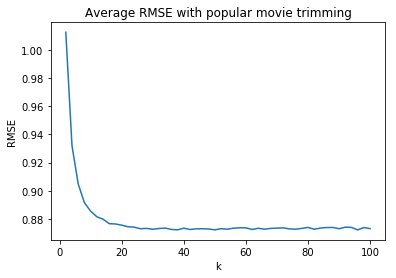

In [16]:
plt.plot(kValues, RMSE_pop)
plt.title("Average RMSE with popular movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [17]:
best_k_pop = -1
for i in range(1,len(kValues)-3):
    if (abs(RMSE_pop[i]-RMSE_pop[i-1]) / RMSE_pop[i]) <= 0.001 and (abs(MAE_pop[i]-MAE_pop[i-1]) / MAE_pop[i]) <= 0.001\
    and (abs(RMSE_pop[i+1]-RMSE_pop[i]) / RMSE_pop[i+1]) <= 0.001 and (abs(MAE_pop[i+1]-MAE_pop[i]) / MAE_pop[i+1]) <= 0.001\
    and (abs(RMSE_pop[i+2]-RMSE_pop[i+1]) / RMSE_pop[i+2]) <= 0.001 and (abs(MAE_pop[i+2]-MAE_pop[i+1]) / MAE_pop[i+2]) <= 0.001\
    and (abs(RMSE_pop[i+3]-RMSE_pop[i+2]) / RMSE_pop[i+3]) <= 0.001 and (abs(MAE_pop[i+3]-MAE_pop[i+2]) / MAE_pop[i+3]) <= 0.001:
        print('best_k_pop =', kValues[i])
        best_k_pop = kValues[i]
        break

best_k_pop = 28


In [18]:
RMSE_avg = 0
for j in range(i,len(kValues)):
    RMSE_avg += RMSE_pop[i]
RMSE_avg /= len(kValues) - i
print('steady state values of average RMSE: ',RMSE_avg)

steady state values of average RMSE:  0.8733519410771864


# Question 13

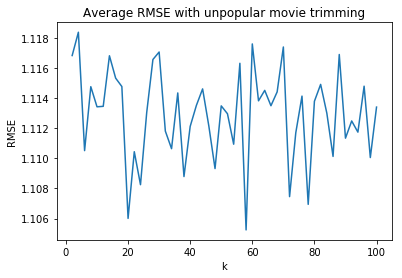

In [19]:
plt.plot(kValues, RMSE_un)
plt.title("Average RMSE with unpopular movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [20]:
best_k_un = -1
for i in range(1,len(kValues)-3):
    if (abs(RMSE_un[i]-RMSE_un[i-1]) / RMSE_un[i]) <= 0.001 and (abs(MAE_un[i]-MAE_un[i-1]) / MAE_un[i]) <= 0.001\
    and (abs(RMSE_un[i+1]-RMSE_un[i]) / RMSE_un[i+1]) <= 0.001 and (abs(MAE_un[i+1]-MAE_un[i]) / MAE_un[i+1]) <= 0.001\
    and (abs(RMSE_un[i+2]-RMSE_un[i+1]) / RMSE_un[i+2]) <= 0.001 and (abs(MAE_un[i+2]-MAE_un[i+1]) / MAE_un[i+2]) <= 0.001\
    and (abs(RMSE_un[i+3]-RMSE_un[i+2]) / RMSE_un[i+3]) <= 0.001 and (abs(MAE_un[i+3]-MAE_un[i+2]) / MAE_un[i+3]) <= 0.001:
        print('best_k_un =', kValues[i])
        best_k_un = kValues[i]
        break

In [21]:
RMSE_avg = 0
for j in range(i,len(kValues)):
    RMSE_avg += RMSE_un[i]
RMSE_avg /= len(kValues) - i
print('steady state values of average RMSE: ',RMSE_avg)

steady state values of average RMSE:  1.1117505668695278


# Question 14

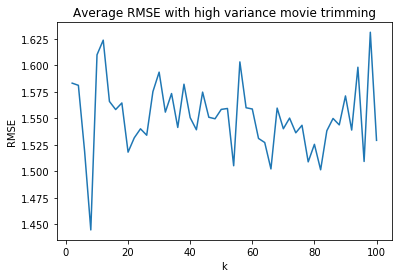

In [22]:
plt.plot(kValues, RMSE_var)
plt.title("Average RMSE with high variance movie trimming")
plt.xlabel('k')
plt.ylabel('RMSE')
plt.show()

In [23]:
best_k_var = -1
for i in range(1,len(kValues)-3):
    if (abs(RMSE_var[i]-RMSE_var[i-1]) / RMSE_var[i]) <= 0.001 and (abs(MAE_var[i]-MAE_var[i-1]) / MAE_var[i]) <= 0.001\
    and (abs(RMSE_var[i+1]-RMSE_var[i]) / RMSE_var[i+1]) <= 0.001 and (abs(MAE_var[i+1]-MAE_var[i]) / MAE_var[i+1]) <= 0.001\
    and (abs(RMSE_var[i+2]-RMSE_var[i+1]) / RMSE_var[i+2]) <= 0.001 and (abs(MAE_var[i+2]-MAE_var[i+1]) / MAE_var[i+2]) <= 0.001\
    and (abs(RMSE_var[i+3]-RMSE_var[i+2]) / RMSE_var[i+3]) <= 0.001 and (abs(MAE_var[i+3]-MAE_var[i+2]) / MAE_var[i+3]) <= 0.001:
        print('best_k_var =', kValues[i])
        best_k_var = kValues[i]
        break

In [24]:
RMSE_avg = 0
for j in range(i,len(kValues)):
    RMSE_avg += RMSE_var[i]
RMSE_avg /= len(kValues) - i
if i == len(kValues)-4:
    RMSE_avg = np.mean(RMSE_var)
print('steady state values of average RMSE: ',RMSE_avg)

steady state values of average RMSE:  1.5509036264381093


# Question 15

In [25]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

In [27]:
from surprise.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
trainset, testset = train_test_split(data, test_size=0.1)
algo = KNNWithMeans(kKNNWithMeans=best_k, sim_options={'name': 'pearson', 'user_based': True})
algo.fit(trainset)
prediction4 = algo.test(testset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


threshold =  2.5


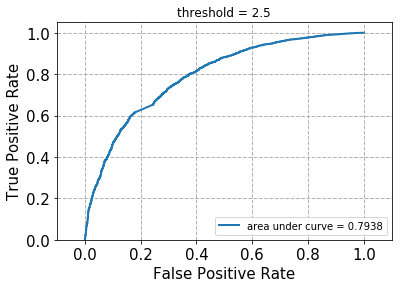

threshold =  3


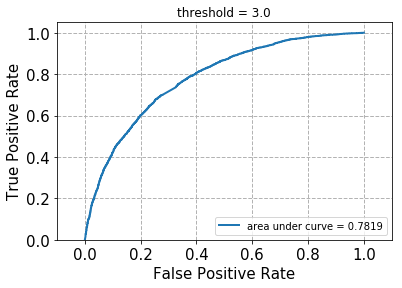

threshold =  3.5


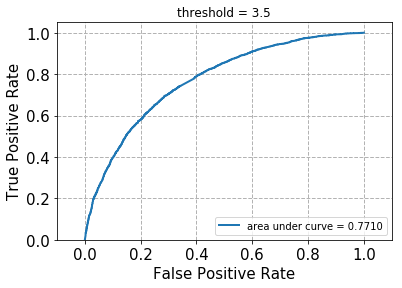

threshold =  4


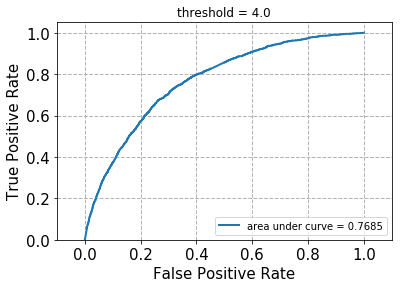

In [28]:
thresholds = [2.5, 3, 3.5, 4]
for i in thresholds:
    print('threshold = ', i)
    y = [1 if pred[2] > i else 0 for pred in prediction4]
    scores = [pred[3] for pred in prediction4]
    fpr, tpr, _ = roc_curve(y, scores)
    plot_roc(fpr, tpr)
    plt.title('threshold = %.1f' % i)
    plt.show()